In [2]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [27]:
raw_df = pd.read_csv("pamstest_results.csv")
raw_proc_df = pd.read_csv("preproc.csv")
display(raw_df)
display(raw_proc_df)

#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

,Index,Model,Image,foundDots,Ismaels,Processed,f-I,f-P,x1,x1.1
0,0,model_base10_224_11360.h5,aphani_flos_133.png,84,90,81,6,3,6.666667,3.703704
1,1,model_base10_224_11360.h5,aphani_flos_170.png,82,90,48,8,34,8.888889,70.833333
2,2,model_base10_224_11360.h5,aphani_flos_186.png,97,113,113,16,16,14.159292,14.159292
3,3,model_base10_224_11360.h5,aphani_flos_267.png,49,55,58,6,9,10.909091,15.517241
4,4,model_base10_224_11360.h5,aphani_flos_278.png,59,70,108,11,49,15.714286,45.370370
...,...,...,...,...,...,...,...,...,...,...
545,5,model_base1_224_no_trichome_5_85440_mk2.h5,aphani_flos_299.png,141,168,210,27,69,16.071429,32.857143
546,6,model_base1_224_no_trichome_5_85440_mk2.h5,aphani_flos_308.png,83,77,83,6,0,7.792208,0.000000
547,7,model_base1_224_no_trichome_5_85440_mk2.h5,aphani_flos_335.png,79,91,102,12,23,13.186813,22.549020
548,8,model_base1_224_no_trichome_5_85440_mk2.h5,aphani_flos_349.png,26,34,37,8,11,23.529412,29.729730


,Index,Method,Image,GTdots,afterDots,absDiff,percentageError
0,0,base1_224,aphani_flos_111.png,66,59,7,10.606061
1,1,base1_224,aphani_flos_115.png,73,51,22,30.136986
2,2,base1_224,aphani_flos_12.png,73,56,17,23.287671
3,3,base1_224,aphani_flos_120.png,116,84,32,27.586207
4,4,base1_224,aphani_flos_125.png,63,51,12,19.047619
...,...,...,...,...,...,...,...
391,5,base1_224_morph,aphani_flos_299.png,168,210,42,25.000000
392,6,base1_224_morph,aphani_flos_308.png,77,83,6,7.792208
393,7,base1_224_morph,aphani_flos_335.png,91,102,11,12.087912
394,8,base1_224_morph,aphani_flos_349.png,34,37,3,8.823529


In [39]:
raw_proc_df['Method'] = raw_proc_df['Method'].str.replace("base1_224_", "")
raw_proc_df['Method'] = raw_proc_df['Method'].str.replace("base1_224", "hp_filter")
preproc_names = raw_proc_df['Method'].unique()
print(preproc_names)

raw_df['preprocMethod'] = "hp_filter"
for p in preproc_names:
    raw_df.loc[raw_df['Model'].str.contains(p), 'preprocMethod'] = p

new_df = pd.merge(raw_df, raw_proc_df,  how='outer', left_on=['preprocMethod','Image'], right_on = ['Method','Image'])
new_df = new_df[new_df['Model'].notna()]

new_df['Processed'] = new_df['afterDots']
    
display(new_df)

['hp_filter' 'no_trichome_5' 'no_trichome_2' 'morph']


,Index_x,Model,Image,foundDots,Ismaels,Processed,f-I,f-P,x1,x1.1,preprocMethod,Index_y,Method,GTdots,afterDots,absDiff,percentageError
0,0.0,model_base10_224_11360.h5,aphani_flos_133.png,84.0,90.0,88,6.0,3.0,6.666667,3.703704,hp_filter,0,hp_filter,90,88,2,2.222222
1,0.0,model_base10_224_14200.h5,aphani_flos_133.png,86.0,90.0,88,4.0,5.0,4.444444,6.172840,hp_filter,0,hp_filter,90,88,2,2.222222
2,0.0,model_base10_224_2840.h5,aphani_flos_133.png,75.0,90.0,88,15.0,6.0,16.666667,7.407407,hp_filter,0,hp_filter,90,88,2,2.222222
3,0.0,model_base10_224_5680.h5,aphani_flos_133.png,81.0,90.0,88,9.0,0.0,10.000000,0.000000,hp_filter,0,hp_filter,90,88,2,2.222222
4,0.0,model_base10_224_8520.h5,aphani_flos_133.png,82.0,90.0,88,8.0,1.0,8.888889,1.234568,hp_filter,0,hp_filter,90,88,2,2.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,9.0,model_base1_224_no_trichome_5_113920.h5,aphani_flos_79.png,0.0,64.0,60,64.0,72.0,100.000000,100.000000,no_trichome_5,9,no_trichome_5,64,60,4,6.250000
546,9.0,model_base1_224_no_trichome_5_142400.h5,aphani_flos_79.png,0.0,64.0,60,64.0,72.0,100.000000,100.000000,no_trichome_5,9,no_trichome_5,64,60,4,6.250000
547,9.0,model_base1_224_no_trichome_5_28480_mk2.h5,aphani_flos_79.png,0.0,64.0,60,64.0,72.0,100.000000,100.000000,no_trichome_5,9,no_trichome_5,64,60,4,6.250000
548,9.0,model_base1_224_no_trichome_5_56960_mk2.h5,aphani_flos_79.png,0.0,64.0,60,64.0,72.0,100.000000,100.000000,no_trichome_5,9,no_trichome_5,64,60,4,6.250000


In [40]:
# Which model is best?
my_df = new_df[['Model', 'Image', 'foundDots', 'Ismaels', 'Processed']].copy()

my_df['error pI'] = abs(my_df['Ismaels'] - my_df['foundDots'])
my_df['percentage error pI'] = 100 * my_df['error pI']/my_df['Ismaels']

my_df['error pP'] = abs(my_df['Processed'] - my_df['foundDots'])
my_df['percentage error pP'] = 100 * my_df['error pP']/my_df['Processed']

my_df = my_df.groupby('Model').mean()
my_df.sort_values('Model', inplace=True)
display(my_df)

,foundDots,Ismaels,Processed,error pI,percentage error pI,error pP,percentage error pP
Model,,,,,,,
model_base10_224_11360.h5,75.0,85.2,77.3,10.2,12.048973,5.1,7.972039
model_base10_224_14200.h5,80.1,85.2,77.3,6.3,7.128571,7.6,9.655202
model_base10_224_2840.h5,61.6,85.2,77.3,23.6,24.611345,16.5,19.043492
model_base10_224_5680.h5,69.2,85.2,77.3,16.2,17.797972,9.5,12.426687
model_base10_224_8520.h5,71.5,85.2,77.3,13.7,14.712203,8.0,9.992676
model_base10_224_morph_11360.h5,83.1,85.2,91.2,6.7,6.819850,18.9,21.363654
model_base10_224_morph_14200.h5,84.7,85.2,91.2,3.3,4.290897,17.3,20.847710
model_base10_224_morph_2840.h5,62.3,85.2,91.2,22.9,24.819146,31.3,30.204047
model_base10_224_morph_5680.h5,76.5,85.2,91.2,8.7,9.750040,21.5,23.488103


,Model,Image,percentage error pI
0,model_base10_224_11360.h5,aphani_flos_133.png,6.666667
1,model_base10_224_14200.h5,aphani_flos_133.png,4.444444
2,model_base10_224_2840.h5,aphani_flos_133.png,16.666667
3,model_base10_224_5680.h5,aphani_flos_133.png,10.000000
4,model_base10_224_8520.h5,aphani_flos_133.png,8.888889
...,...,...,...
545,model_base1_224_no_trichome_5_113920.h5,aphani_flos_79.png,100.000000
546,model_base1_224_no_trichome_5_142400.h5,aphani_flos_79.png,100.000000
547,model_base1_224_no_trichome_5_28480_mk2.h5,aphani_flos_79.png,100.000000
548,model_base1_224_no_trichome_5_56960_mk2.h5,aphani_flos_79.png,100.000000


Model,model_base10_224_11360.h5,model_base10_224_14200.h5,model_base10_224_2840.h5,model_base10_224_5680.h5,model_base10_224_8520.h5,model_base10_224_morph_11360.h5,model_base10_224_morph_14200.h5,model_base10_224_morph_2840.h5,model_base10_224_morph_5680.h5,model_base10_224_morph_8520.h5,...,model_base1_224_morph_113920.h5,model_base1_224_morph_142400.h5,model_base1_224_morph_28480.h5,model_base1_224_morph_56960.h5,model_base1_224_morph_85440.h5,model_base1_224_no_trichome_5_113920.h5,model_base1_224_no_trichome_5_142400.h5,model_base1_224_no_trichome_5_28480_mk2.h5,model_base1_224_no_trichome_5_56960_mk2.h5,model_base1_224_no_trichome_5_85440_mk2.h5
Image,,,,,,,,,,,,,,,,,,,,,
aphani_flos_133.png,6.666667,4.444444,16.666667,10.000000,8.888889,4.444444,1.111111,20.000000,11.111111,8.888889,...,5.555556,1.111111,5.555556,15.555556,7.777778,100.0,100.0,100.0,100.0,1.111111
aphani_flos_170.png,8.888889,3.333333,34.444444,22.222222,8.888889,4.444444,3.333333,33.333333,8.888889,1.111111,...,3.333333,6.666667,4.444444,21.111111,3.333333,100.0,100.0,100.0,100.0,0.000000
aphani_flos_186.png,14.159292,8.849558,35.398230,24.778761,16.814159,7.079646,1.769912,36.283186,8.849558,6.194690,...,5.309735,4.424779,5.309735,15.929204,4.424779,100.0,100.0,100.0,100.0,7.964602
aphani_flos_267.png,10.909091,3.636364,12.727273,1.818182,9.090909,1.818182,1.818182,10.909091,9.090909,0.000000,...,7.272727,9.090909,1.818182,0.000000,3.636364,100.0,100.0,100.0,100.0,10.909091
aphani_flos_278.png,15.714286,20.000000,35.714286,21.428571,30.000000,7.142857,8.571429,30.000000,17.142857,17.142857,...,4.285714,2.857143,14.285714,25.714286,7.142857,100.0,100.0,100.0,100.0,17.142857
aphani_flos_299.png,20.833333,12.500000,42.857143,29.761905,29.761905,14.880952,4.166667,38.095238,19.047619,12.500000,...,2.380952,5.952381,12.500000,22.619048,4.166667,100.0,100.0,100.0,100.0,16.071429
aphani_flos_308.png,3.896104,5.194805,1.298701,1.298701,14.285714,11.688312,9.090909,5.194805,2.597403,1.298701,...,7.792208,6.493506,5.194805,11.688312,3.896104,100.0,100.0,100.0,100.0,7.792208
aphani_flos_335.png,2.197802,0.000000,24.175824,15.384615,5.494505,7.692308,1.098901,19.780220,0.000000,0.000000,...,1.098901,15.384615,2.197802,10.989011,3.296703,100.0,100.0,100.0,100.0,13.186813
aphani_flos_349.png,29.411765,11.764706,14.705882,29.411765,17.647059,5.882353,8.823529,26.470588,17.647059,14.705882,...,11.764706,0.000000,17.647059,20.588235,5.882353,100.0,100.0,100.0,100.0,23.529412


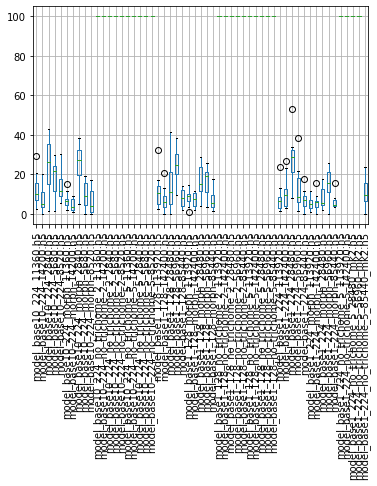

In [41]:
# box plot
my_df = new_df[['Model', 'Image', 'foundDots', 'Ismaels', 'Processed']].copy()

my_df['error pI'] = abs(my_df['Ismaels'] - my_df['foundDots'])
my_df['percentage error pI'] = 100 * my_df['error pI']/my_df['Ismaels']

reduced_df = my_df[['Model', 'Image', 'percentage error pI']]
display(reduced_df)
reduced_df = reduced_df.pivot(index='Image', columns='Model', values='percentage error pI')
display(reduced_df)
boxplot = reduced_df.boxplot(rot=90)

,Model,Image,foundDots,Ismaels,Processed,error processed dots
0,model_base10_224_11360.h5,aphani_flos_133.png,84.0,90.0,88,2.222222
1,model_base10_224_14200.h5,aphani_flos_133.png,86.0,90.0,88,2.222222
2,model_base10_224_2840.h5,aphani_flos_133.png,75.0,90.0,88,2.222222
3,model_base10_224_5680.h5,aphani_flos_133.png,81.0,90.0,88,2.222222
4,model_base10_224_8520.h5,aphani_flos_133.png,82.0,90.0,88,2.222222
...,...,...,...,...,...,...
545,model_base1_224_no_trichome_5_113920.h5,aphani_flos_79.png,0.0,64.0,60,6.250000
546,model_base1_224_no_trichome_5_142400.h5,aphani_flos_79.png,0.0,64.0,60,6.250000
547,model_base1_224_no_trichome_5_28480_mk2.h5,aphani_flos_79.png,0.0,64.0,60,6.250000
548,model_base1_224_no_trichome_5_56960_mk2.h5,aphani_flos_79.png,0.0,64.0,60,6.250000


Model,model_base10_224_11360.h5,model_base10_224_14200.h5,model_base10_224_2840.h5,model_base10_224_5680.h5,model_base10_224_8520.h5,model_base10_224_morph_11360.h5,model_base10_224_morph_14200.h5,model_base10_224_morph_2840.h5,model_base10_224_morph_5680.h5,model_base10_224_morph_8520.h5,...,model_base1_224_morph_113920.h5,model_base1_224_morph_142400.h5,model_base1_224_morph_28480.h5,model_base1_224_morph_56960.h5,model_base1_224_morph_85440.h5,model_base1_224_no_trichome_5_113920.h5,model_base1_224_no_trichome_5_142400.h5,model_base1_224_no_trichome_5_28480_mk2.h5,model_base1_224_no_trichome_5_56960_mk2.h5,model_base1_224_no_trichome_5_85440_mk2.h5
Image,,,,,,,,,,,,,,,,,,,,,
aphani_flos_133.png,2.222222,2.222222,2.222222,2.222222,2.222222,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,4.444444,4.444444,4.444444,4.444444,4.444444
aphani_flos_170.png,16.666667,16.666667,16.666667,16.666667,16.666667,46.666667,46.666667,46.666667,46.666667,46.666667,...,46.666667,46.666667,46.666667,46.666667,46.666667,4.444444,4.444444,4.444444,4.444444,4.444444
aphani_flos_186.png,12.389381,12.389381,12.389381,12.389381,12.389381,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.424779,4.424779,4.424779,4.424779,4.424779
aphani_flos_267.png,3.636364,3.636364,3.636364,3.636364,3.636364,5.454545,5.454545,5.454545,5.454545,5.454545,...,5.454545,5.454545,5.454545,5.454545,5.454545,5.454545,5.454545,5.454545,5.454545,5.454545
aphani_flos_278.png,11.428571,11.428571,11.428571,11.428571,11.428571,54.285714,54.285714,54.285714,54.285714,54.285714,...,54.285714,54.285714,54.285714,54.285714,54.285714,0.000000,0.000000,0.000000,0.000000,0.000000
aphani_flos_299.png,19.642857,19.642857,19.642857,19.642857,19.642857,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aphani_flos_308.png,6.493506,6.493506,6.493506,6.493506,6.493506,7.792208,7.792208,7.792208,7.792208,7.792208,...,7.792208,7.792208,7.792208,7.792208,7.792208,2.597403,2.597403,2.597403,2.597403,2.597403
aphani_flos_335.png,4.395604,4.395604,4.395604,4.395604,4.395604,12.087912,12.087912,12.087912,12.087912,12.087912,...,12.087912,12.087912,12.087912,12.087912,12.087912,4.395604,4.395604,4.395604,4.395604,4.395604
aphani_flos_349.png,11.764706,11.764706,11.764706,11.764706,11.764706,8.823529,8.823529,8.823529,8.823529,8.823529,...,8.823529,8.823529,8.823529,8.823529,8.823529,14.705882,14.705882,14.705882,14.705882,14.705882


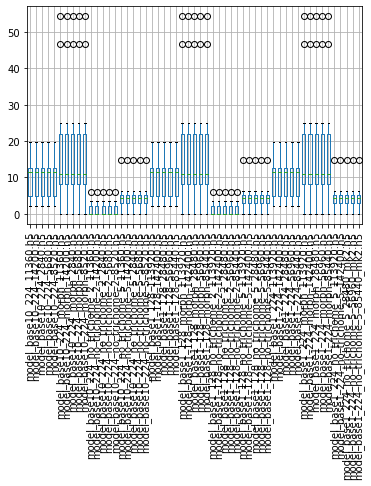

In [44]:
# Which processing method is best?
my_df = new_df[['Model', 'Image', 'foundDots', 'Ismaels', 'Processed']].copy()
my_df['error processed dots'] = 100 * abs(my_df['Ismaels'] - my_df['Processed']) / my_df['Ismaels']
display(my_df)

reduced_df = my_df[['Model', 'Image', 'error processed dots']]
reduced_df = reduced_df.pivot(index='Image', columns='Model', values='error processed dots')
display(reduced_df)
boxplot = reduced_df.boxplot(rot=90)



In [48]:
# Which image is most challenging?
my_df = new_df[['Model', 'Image', 'foundDots', 'Ismaels', 'Processed']].copy()
display(my_df)
# Remove rows where the model didn't learn anything except black:
my_df = my_df[my_df["foundDots"] != 0]

my_df['error pI'] = abs(my_df['Ismaels'] - my_df['foundDots'])
my_df['percentage error pI'] = 100 * my_df['error pI']/my_df['Ismaels']

my_df['error pP'] = abs(my_df['Processed'] - my_df['foundDots'])
my_df['percentage error pP'] = 100 * my_df['error pP']/my_df['Processed']

my_df = my_df.groupby('Image').mean()
display(my_df)

,Model,Image,foundDots,Ismaels,Processed
0,model_base10_224_11360.h5,aphani_flos_133.png,84.0,90.0,88
1,model_base10_224_14200.h5,aphani_flos_133.png,86.0,90.0,88
2,model_base10_224_2840.h5,aphani_flos_133.png,75.0,90.0,88
3,model_base10_224_5680.h5,aphani_flos_133.png,81.0,90.0,88
4,model_base10_224_8520.h5,aphani_flos_133.png,82.0,90.0,88
...,...,...,...,...,...
545,model_base1_224_no_trichome_5_113920.h5,aphani_flos_79.png,0.0,64.0,60
546,model_base1_224_no_trichome_5_142400.h5,aphani_flos_79.png,0.0,64.0,60
547,model_base1_224_no_trichome_5_28480_mk2.h5,aphani_flos_79.png,0.0,64.0,60
548,model_base1_224_no_trichome_5_56960_mk2.h5,aphani_flos_79.png,0.0,64.0,60


,foundDots,Ismaels,Processed,error pI,percentage error pI,error pP,percentage error pP
Image,,,,,,,
aphani_flos_133.png,83.129032,90.0,84.548387,7.709677,8.566308,5.290323,6.217032
aphani_flos_170.png,82.290323,90.0,62.290323,9.967742,11.075269,22.451613,42.203801
aphani_flos_186.png,98.322581,113.0,106.064516,15.000000,13.274336,10.322581,9.689338
aphani_flos_267.png,54.096774,55.0,55.387097,3.419355,6.217009,4.129032,7.495064
aphani_flos_278.png,58.483871,70.0,92.258065,11.774194,16.820276,33.774194,35.166082
aphani_flos_299.png,141.709677,168.0,172.354839,26.677419,15.879416,41.419355,22.208141
aphani_flos_308.png,78.516129,77.0,77.419355,5.903226,7.666527,6.451613,8.500907
aphani_flos_335.png,88.838710,91.0,94.258065,8.612903,9.464729,12.129032,12.910860
aphani_flos_349.png,26.935484,34.0,33.354839,7.064516,20.777989,6.419355,19.008508
